In [1]:
%matplotlib inline
import numpy as np
import torch
from torch import nn
from itertools import chain
from sklearn.preprocessing import MultiLabelBinarizer
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [14, 8]

import sys
sys.path.append('..')
from mcpt.contrastlearning import WeightedCosineSimilarityLoss

In [2]:
def plot_embeddings(embedding, labels):
    embedding = embedding.detach().t().numpy()
    labels = labels.t().numpy()
    fig, ax = plt.subplots()
    x = embedding[0]
    y = embedding[1]
    ax.scatter(x[labels[1] == 0], y[labels[1] == 0], s=100, c='#e7d9a5ff', marker='s')
    ax.scatter(x[labels[1] == 1], y[labels[1] == 1], s=100, c='#f5c211ff', marker='s')
    xl, xr = ax.get_xbound()
    shift = (xr - xl) / 90
    ax.scatter(x[labels[0] == 0]-shift, y[labels[0] == 0], s=100, c='#e6aeaeff', marker='s')
    ax.scatter(x[labels[0] == 1]-shift, y[labels[0] == 1], s=100, c='#ed333bff', marker='s')
    ax.scatter(x[labels[2] == 0]+shift, y[labels[2] == 0], s=100, c='#9db3cdff', marker='s')
    ax.scatter(x[labels[2] == 1]+shift, y[labels[2] == 1], s=100, c='#1c71d8ff', marker='s')
    for i in range(len(x)):
        ax.annotate(str(i+1), (x[i], y[i]))
    plt.show()

In [3]:
n_classes = 3
#n_with_x_labels = [2, 3, 2]
n_with_x_labels = [4, 8, 3]
n = np.sum(n_with_x_labels)
rng = np.random.default_rng(seed=42)
embeddings = torch.tensor(rng.random((n, 2)), requires_grad=True)
#embeddings = torch.rand((n, 2), requires_grad=True, seed=42)
labels = [
    [tuple(x) for x in rng.integers(n_classes, size=(n_with_x_labels[0],3))],
    [tuple(x) for x in rng.integers(n_classes, size=(n_with_x_labels[1],2))],
    [tuple(x) for x in rng.integers(n_classes, size=(n_with_x_labels[2],1))],
]
binarizer = MultiLabelBinarizer()
labels = torch.tensor(binarizer.fit_transform(chain.from_iterable(labels)), dtype=torch.float32)

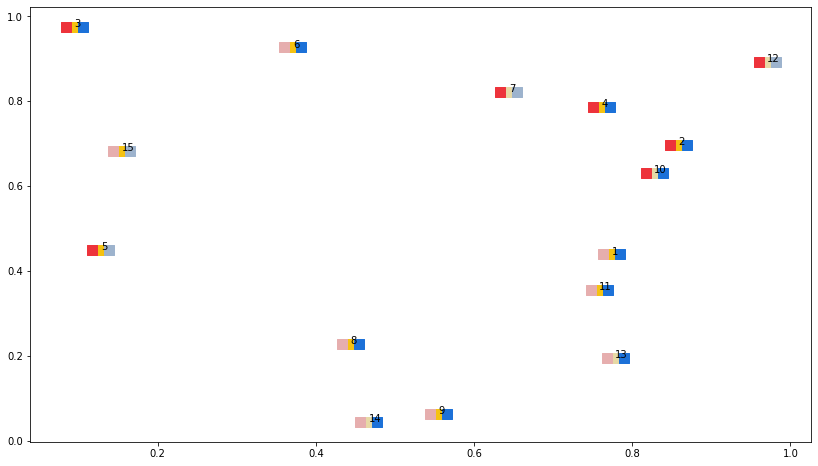

In [4]:
plot_embeddings(embeddings, labels)

In [5]:
WCSL = WeightedCosineSimilarityLoss(3)
optimiser = torch.optim.SGD([embeddings], lr=1e-1, momentum=True)

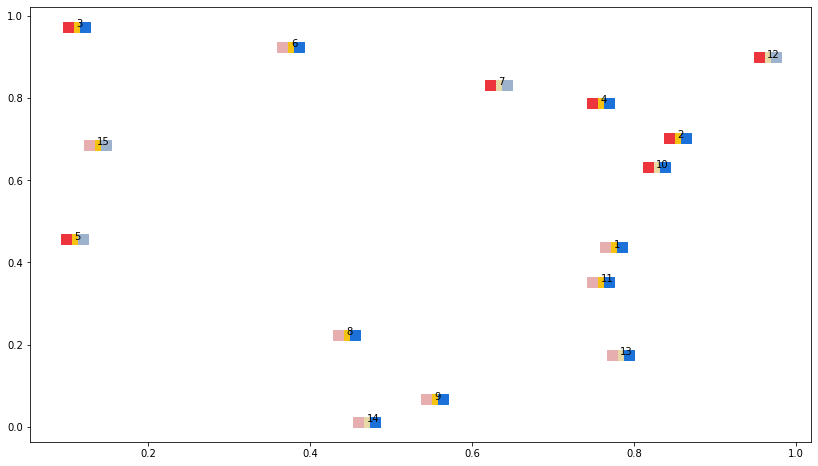

tensor([[-0.0136,  0.0239],
        [ 0.0457, -0.0562],
        [-0.1785,  0.0172],
        [ 0.0262, -0.0254],
        [ 0.1943, -0.0553],
        [-0.0558,  0.0223],
        [ 0.1109, -0.0868],
        [-0.0192,  0.0375],
        [ 0.0033, -0.0288],
        [-0.0019,  0.0025],
        [-0.0090,  0.0193],
        [ 0.0578, -0.0628],
        [-0.0477,  0.1908],
        [-0.0303,  0.3224],
        [ 0.1691, -0.0382]], dtype=torch.float64)


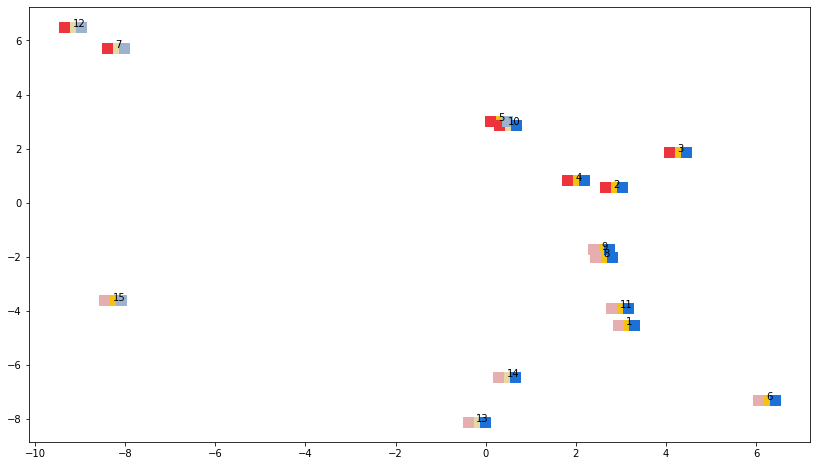

tensor([[-1.4919e-02, -1.0163e-02],
        [ 6.2950e-03, -3.2848e-02],
        [ 1.0638e-03, -2.4157e-03],
        [ 4.5200e-03, -1.1422e-02],
        [ 9.8587e-03, -9.3034e-04],
        [-4.8436e-03, -4.1675e-03],
        [-1.1668e-02, -1.6873e-02],
        [ 2.4008e-03,  3.1256e-03],
        [ 6.2997e-03,  9.2572e-03],
        [-1.3471e-02,  2.1068e-03],
        [-1.3449e-02, -1.0177e-02],
        [-1.0332e-02, -1.4566e-02],
        [-2.1228e-03,  4.9075e-05],
        [ 1.2977e-03,  9.7616e-05],
        [-3.3181e-03,  7.7652e-03]], dtype=torch.float64)


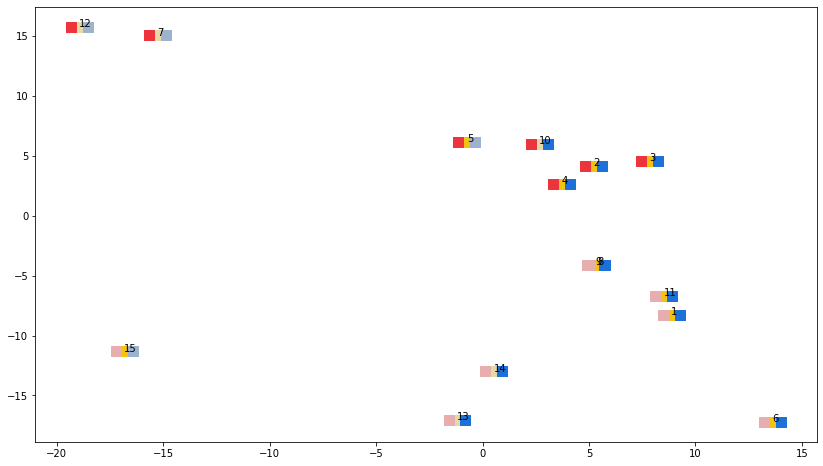

tensor([[-1.9387e-03, -2.0629e-03],
        [-3.5396e-03,  4.4659e-03],
        [ 8.3402e-04, -1.4334e-03],
        [-2.8308e-03,  3.9098e-03],
        [-4.5589e-04, -5.3142e-05],
        [-3.0697e-03, -2.4273e-03],
        [-3.2775e-03, -3.3497e-03],
        [ 4.2431e-04,  5.5740e-04],
        [ 2.3566e-04,  3.0601e-04],
        [ 7.4781e-03, -3.3176e-03],
        [-1.6251e-04, -2.0498e-04],
        [-3.7371e-03, -4.5028e-03],
        [-3.3872e-03,  2.3996e-04],
        [-2.6378e-03, -1.0259e-04],
        [-8.3704e-04,  1.2500e-03]], dtype=torch.float64)


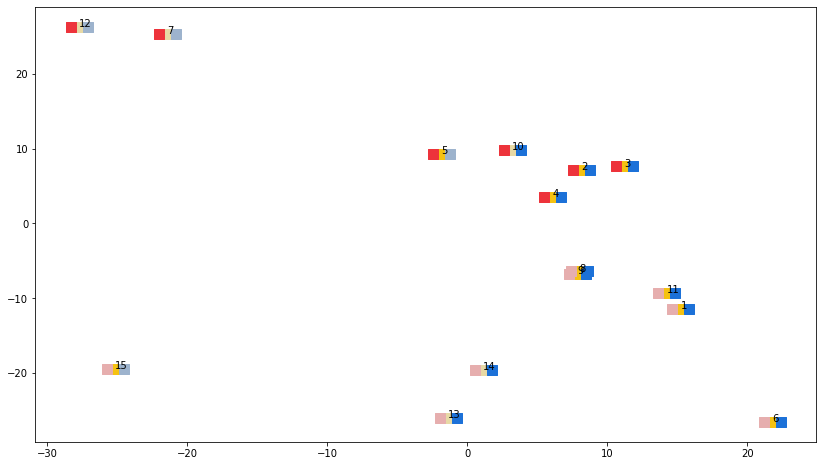

tensor([[ 1.1446e-04,  1.5262e-04],
        [-3.2224e-03,  3.6376e-03],
        [-2.1456e-04,  3.1658e-04],
        [ 1.4283e-03, -2.4422e-03],
        [-3.2783e-03, -6.6023e-04],
        [-1.8397e-03, -1.5103e-03],
        [-9.8801e-04, -8.3882e-04],
        [-5.0982e-04, -6.3670e-04],
        [-1.3279e-03, -1.5466e-03],
        [ 2.7787e-03, -9.1088e-04],
        [ 9.0188e-04,  1.3750e-03],
        [-1.8722e-03, -1.9802e-03],
        [-2.1000e-03,  1.1208e-04],
        [-1.6163e-03, -9.3607e-05],
        [-3.9567e-04,  5.1365e-04]], dtype=torch.float64)


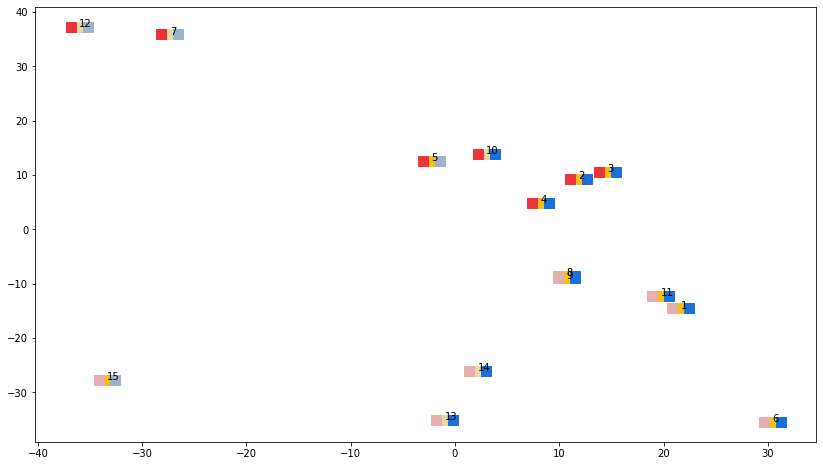

tensor([[ 4.4183e-04,  6.5642e-04],
        [-1.2817e-03,  1.6203e-03],
        [-4.9328e-04,  6.8157e-04],
        [ 9.6729e-04, -1.6157e-03],
        [-2.2755e-03, -4.0981e-04],
        [-1.2378e-03, -1.0619e-03],
        [-1.9268e-04, -1.4711e-04],
        [-4.7924e-04, -5.9943e-04],
        [-9.5242e-04, -1.1265e-03],
        [ 4.3509e-04, -9.4718e-05],
        [ 7.9713e-04,  1.2848e-03],
        [-1.0731e-03, -1.0384e-03],
        [-1.3522e-03,  3.9826e-05],
        [-9.2505e-04, -7.7108e-05],
        [-2.4655e-04,  2.9797e-04]], dtype=torch.float64)


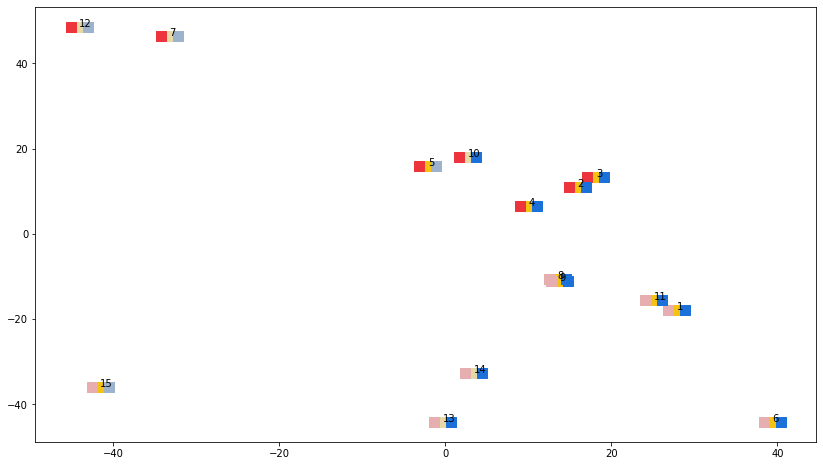

tensor([[ 4.6076e-04,  7.2058e-04],
        [-2.4226e-04,  3.4657e-04],
        [-4.7591e-04,  6.4456e-04],
        [ 8.4962e-05, -1.2860e-04],
        [-1.1327e-03, -1.4822e-04],
        [-8.9202e-04, -7.9612e-04],
        [ 1.1603e-04,  8.2964e-05],
        [-2.7368e-04, -3.5041e-04],
        [-4.4942e-04, -5.5962e-04],
        [-4.2109e-04,  6.3034e-05],
        [ 6.1260e-04,  9.9129e-04],
        [-6.6401e-04, -6.0298e-04],
        [-9.2541e-04,  6.9327e-06],
        [-5.3431e-04, -5.6623e-05],
        [-1.7424e-04,  2.0143e-04]], dtype=torch.float64)


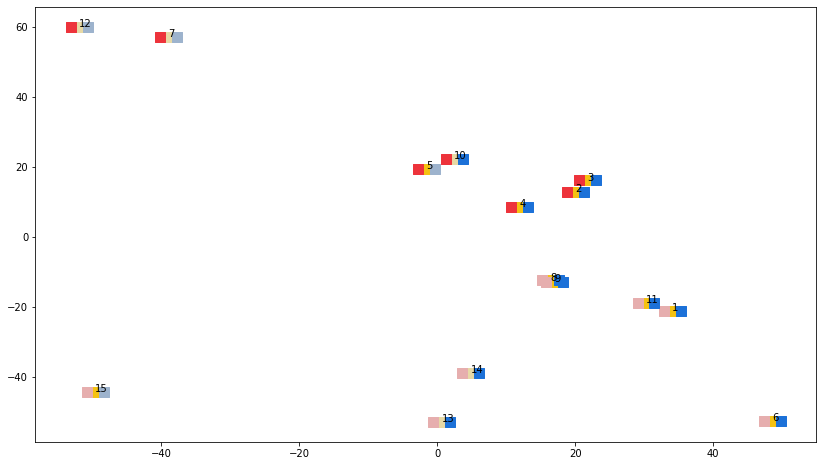

tensor([[ 4.1934e-04,  6.7040e-04],
        [ 1.8183e-04, -2.8538e-04],
        [-3.9620e-04,  5.3774e-04],
        [-4.3957e-04,  6.2002e-04],
        [-3.5071e-04, -2.9347e-05],
        [-6.7010e-04, -6.1883e-04],
        [ 2.3282e-04,  1.5954e-04],
        [-9.3648e-05, -1.2316e-04],
        [-1.0500e-04, -1.3771e-04],
        [-6.8727e-04,  7.6530e-05],
        [ 4.6325e-04,  7.3788e-04],
        [-4.3498e-04, -3.7667e-04],
        [-6.6385e-04, -7.5816e-06],
        [-3.0511e-04, -3.8020e-05],
        [-1.3023e-04,  1.4598e-04]], dtype=torch.float64)


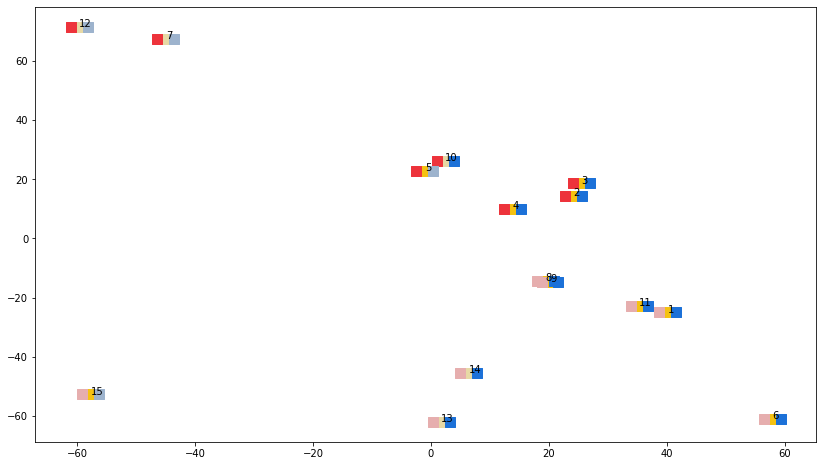

tensor([[ 3.6999e-04,  5.9518e-04],
        [ 3.1773e-04, -5.2949e-04],
        [-3.1796e-04,  4.3706e-04],
        [-5.9398e-04,  8.1553e-04],
        [ 1.0464e-04,  4.8728e-06],
        [-5.1778e-04, -4.9245e-04],
        [ 2.6775e-04,  1.7833e-04],
        [ 2.8583e-05,  3.8454e-05],
        [ 9.3719e-05,  1.2807e-04],
        [-7.3748e-04,  6.7481e-05],
        [ 3.5252e-04,  5.4897e-04],
        [-2.9891e-04, -2.4948e-04],
        [-4.9402e-04, -1.3603e-05],
        [-1.6583e-04, -2.3162e-05],
        [-9.9516e-05,  1.0903e-04]], dtype=torch.float64)


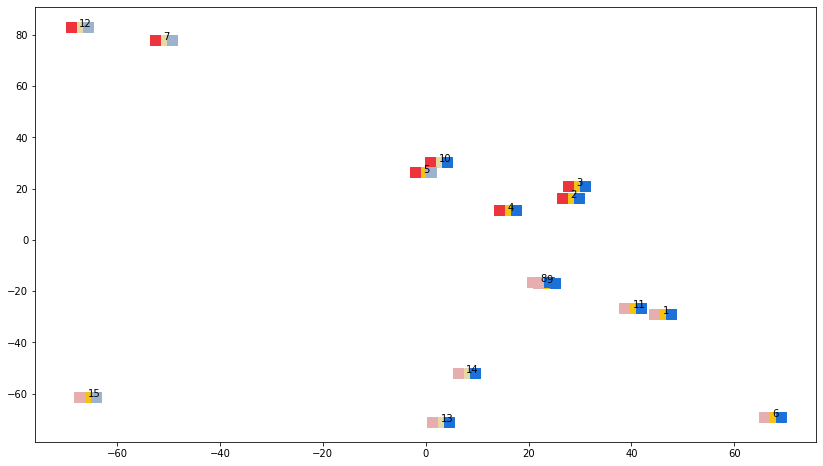

tensor([[ 3.2458e-04,  5.2076e-04],
        [ 3.3247e-04, -5.7331e-04],
        [-2.5314e-04,  3.5408e-04],
        [-5.3505e-04,  7.3932e-04],
        [ 3.3919e-04,  6.7924e-06],
        [-4.0843e-04, -3.9849e-04],
        [ 2.6701e-04,  1.7443e-04],
        [ 1.0178e-04,  1.3918e-04],
        [ 1.9603e-04,  2.7552e-04],
        [-7.0995e-04,  5.8998e-05],
        [ 2.7115e-04,  4.1223e-04],
        [-2.1411e-04, -1.7355e-04],
        [-3.7871e-04, -1.5646e-05],
        [-7.9253e-05, -1.2032e-05],
        [-7.6269e-05,  8.2097e-05]], dtype=torch.float64)


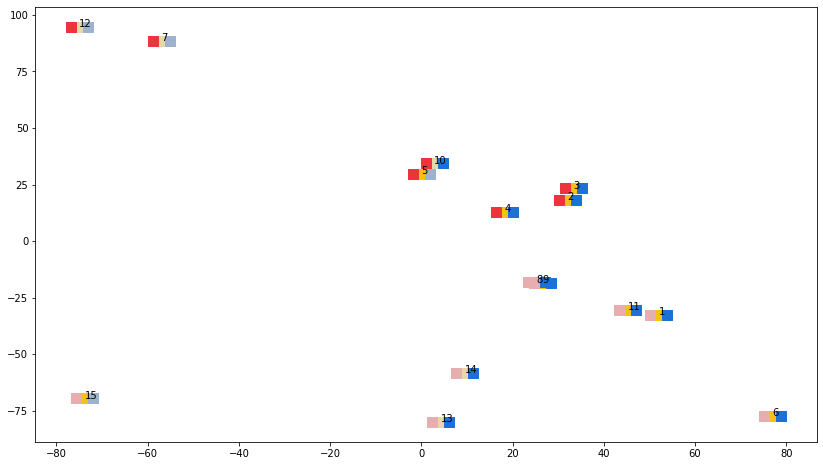

tensor([[ 2.8524e-04,  4.5418e-04],
        [ 3.0001e-04, -5.2572e-04],
        [-2.0103e-04,  2.8669e-04],
        [-3.9322e-04,  5.5790e-04],
        [ 4.3973e-04,  1.0593e-06],
        [-3.2728e-04, -3.2651e-04],
        [ 2.5121e-04,  1.6192e-04],
        [ 1.4049e-04,  1.9400e-04],
        [ 2.4036e-04,  3.4341e-04],
        [-6.5576e-04,  5.3695e-05],
        [ 2.1081e-04,  3.1313e-04],
        [-1.5904e-04, -1.2587e-04],
        [-2.9756e-04, -1.5824e-05],
        [-2.4804e-05, -4.0093e-06],
        [-5.7819e-05,  6.1361e-05]], dtype=torch.float64)


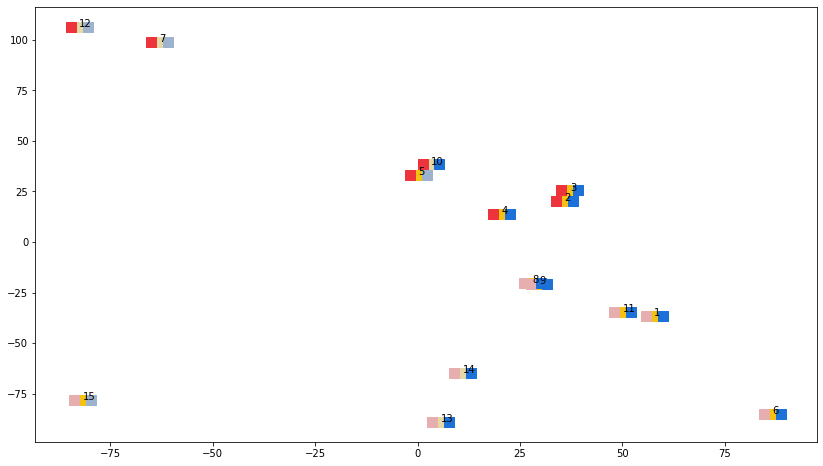

tensor([[ 2.5165e-04,  3.9657e-04],
        [ 2.5217e-04, -4.4375e-04],
        [-1.5890e-04,  2.3113e-04],
        [-2.4189e-04,  3.5575e-04],
        [ 4.6385e-04, -3.8372e-06],
        [-2.6550e-04, -2.7013e-04],
        [ 2.2985e-04,  1.4679e-04],
        [ 1.5663e-04,  2.1721e-04],
        [ 2.5119e-04,  3.6138e-04],
        [-5.9427e-04,  5.0643e-05],
        [ 1.6546e-04,  2.4050e-04],
        [-1.2191e-04, -9.4582e-05],
        [-2.3877e-04, -1.5158e-05],
        [ 9.4070e-06,  1.5954e-06],
        [-4.2775e-05,  4.4871e-05]], dtype=torch.float64)


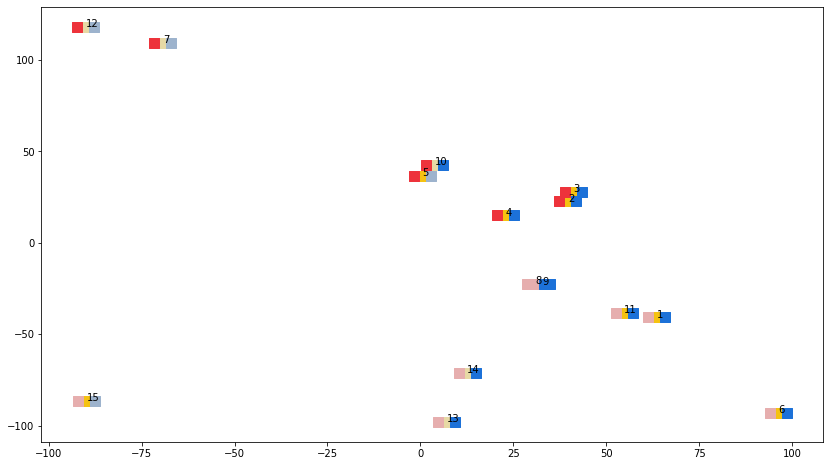

tensor([[ 2.2298e-04,  3.4726e-04],
        [ 2.0255e-04, -3.5532e-04],
        [-1.2437e-04,  1.8444e-04],
        [-1.1303e-04,  1.7271e-04],
        [ 4.4684e-04, -6.1633e-06],
        [-2.1753e-04, -2.2519e-04],
        [ 2.0740e-04,  1.3160e-04],
        [ 1.5860e-04,  2.1990e-04],
        [ 2.4322e-04,  3.4986e-04],
        [-5.3305e-04,  4.8747e-05],
        [ 1.3088e-04,  1.8650e-04],
        [-9.5989e-05, -7.3236e-05],
        [-1.9522e-04, -1.4156e-05],
        [ 3.0512e-05,  5.3727e-06],
        [-3.0325e-05,  3.1504e-05]], dtype=torch.float64)


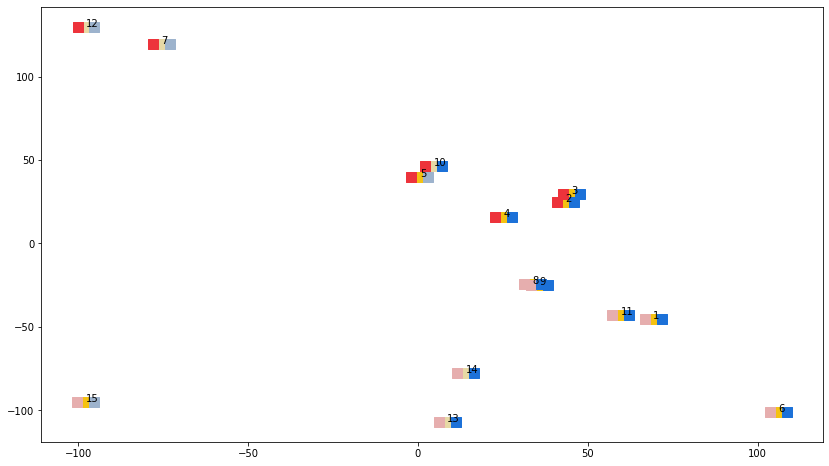

tensor([[ 1.9837e-04,  3.0510e-04],
        [ 1.5676e-04, -2.7299e-04],
        [-9.5733e-05,  1.4461e-04],
        [-1.5641e-05,  2.4774e-05],
        [ 4.0951e-04, -6.3802e-06],
        [-1.7966e-04, -1.8890e-04],
        [ 1.8588e-04,  1.1743e-04],
        [ 1.5202e-04,  2.1002e-04],
        [ 2.2520e-04,  3.2220e-04],
        [-4.7505e-04,  4.7264e-05],
        [ 1.0414e-04,  1.4574e-04],
        [-7.7313e-05, -5.8148e-05],
        [-1.6239e-04, -1.3069e-05],
        [ 4.2956e-05,  7.7918e-06],
        [-1.9943e-05,  2.0549e-05]], dtype=torch.float64)


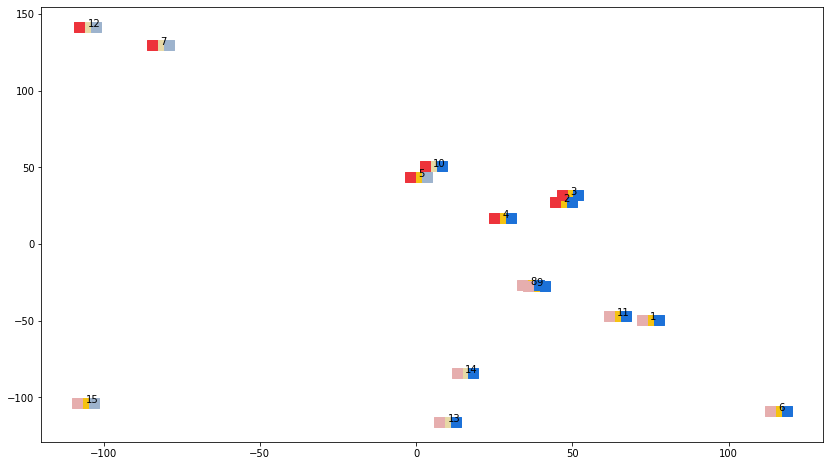

tensor([[ 1.7712e-04,  2.6898e-04],
        [ 1.1683e-04, -2.0154e-04],
        [-7.1796e-05,  1.1034e-04],
        [ 5.1861e-05, -8.4754e-05],
        [ 3.6377e-04, -5.3587e-06],
        [-1.4938e-04, -1.5925e-04],
        [ 1.6613e-04,  1.0466e-04],
        [ 1.4054e-04,  1.9299e-04],
        [ 2.0228e-04,  2.8684e-04],
        [-4.2134e-04,  4.5773e-05],
        [ 8.3185e-05,  1.1454e-04],
        [-6.3456e-05, -4.7137e-05],
        [-1.3726e-04, -1.2019e-05],
        [ 4.9611e-05,  9.2153e-06],
        [-1.1256e-05,  1.1517e-05]], dtype=torch.float64)


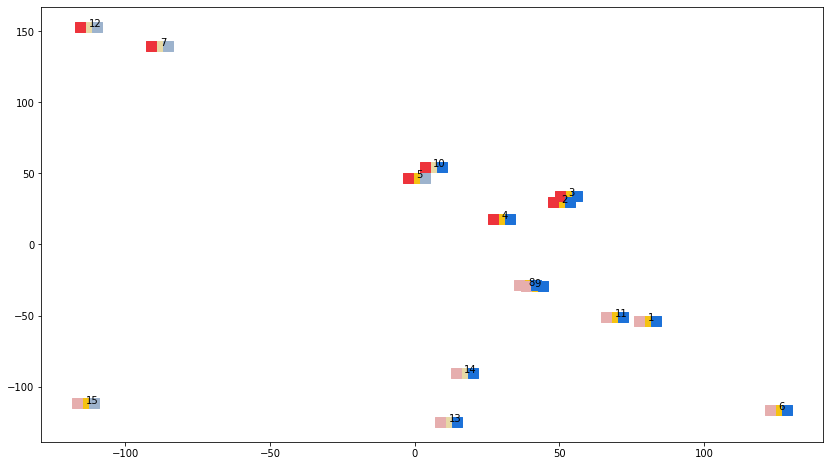

tensor([[ 1.5864e-04,  2.3790e-04],
        [ 8.3158e-05, -1.4198e-04],
        [-5.1718e-05,  8.0774e-05],
        [ 9.4798e-05, -1.5892e-04],
        [ 3.1626e-04, -3.8164e-06],
        [-1.2487e-04, -1.3480e-04],
        [ 1.4842e-04,  9.3328e-05],
        [ 1.2654e-04,  1.7242e-04],
        [ 1.7754e-04,  2.4893e-04],
        [-3.7221e-04,  4.4067e-05],
        [ 6.6570e-05,  9.0329e-05],
        [-5.2898e-05, -3.8871e-05],
        [-1.1779e-04, -1.1062e-05],
        [ 5.2392e-05,  9.9205e-06],
        [-3.9812e-06,  4.0492e-06]], dtype=torch.float64)


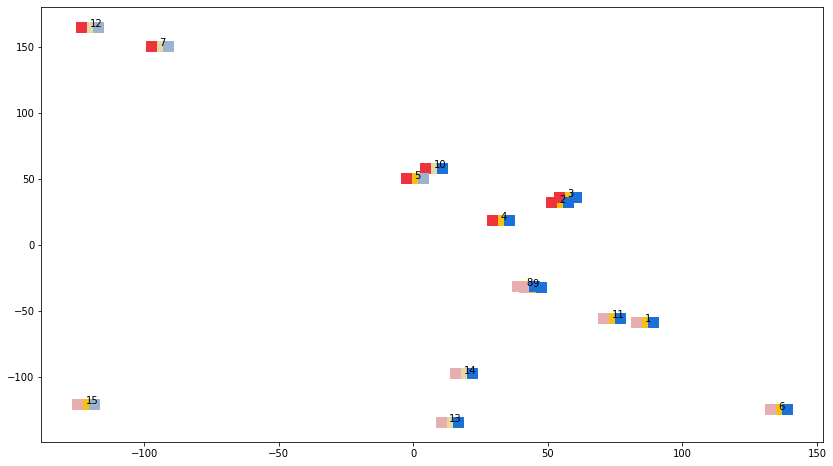

tensor([[ 1.4247e-04,  2.1104e-04],
        [ 5.5386e-05, -9.3595e-05],
        [-3.4873e-05,  5.5277e-05],
        [ 1.1902e-04, -2.0344e-04],
        [ 2.7051e-04, -2.2174e-06],
        [-1.0485e-04, -1.1448e-04],
        [ 1.3271e-04,  8.3368e-05],
        [ 1.1152e-04,  1.5063e-04],
        [ 1.5279e-04,  2.1154e-04],
        [-3.2760e-04,  4.2075e-05],
        [ 5.3253e-05,  7.1306e-05],
        [-4.4661e-05, -3.2505e-05],
        [-1.0253e-04, -1.0214e-05],
        [ 5.2604e-05,  1.0117e-05],
        [ 2.1059e-06, -2.1308e-06]], dtype=torch.float64)


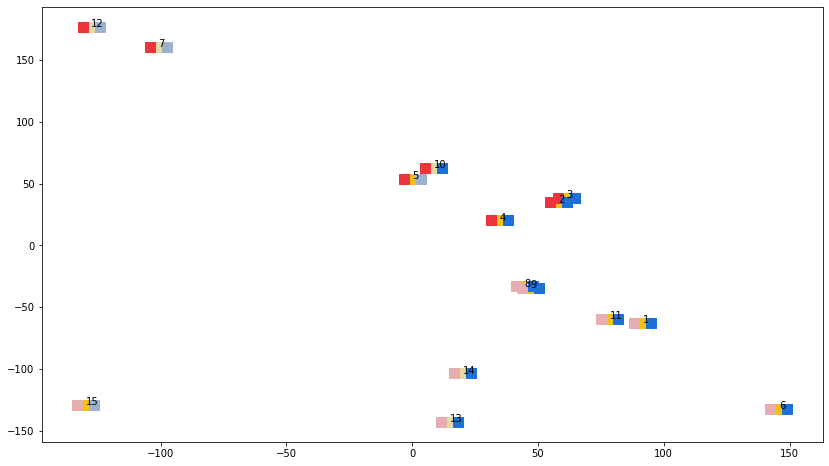

tensor([[ 1.2823e-04,  1.8771e-04],
        [ 3.2866e-05, -5.4994e-05],
        [-2.0772e-05,  3.3374e-05],
        [ 1.2963e-04, -2.2465e-04],
        [ 2.2824e-04, -8.1357e-07],
        [-8.8352e-05, -9.7455e-05],
        [ 1.1887e-04,  7.4641e-05],
        [ 9.6468e-05,  1.2906e-04],
        [ 1.2908e-04,  1.7634e-04],
        [-2.8728e-04,  3.9797e-05],
        [ 4.2475e-05,  5.6196e-05],
        [-3.8097e-05, -2.7493e-05],
        [-9.0435e-05, -9.4775e-06],
        [ 5.1148e-05,  9.9640e-06],
        [ 7.1906e-06, -7.2423e-06]], dtype=torch.float64)


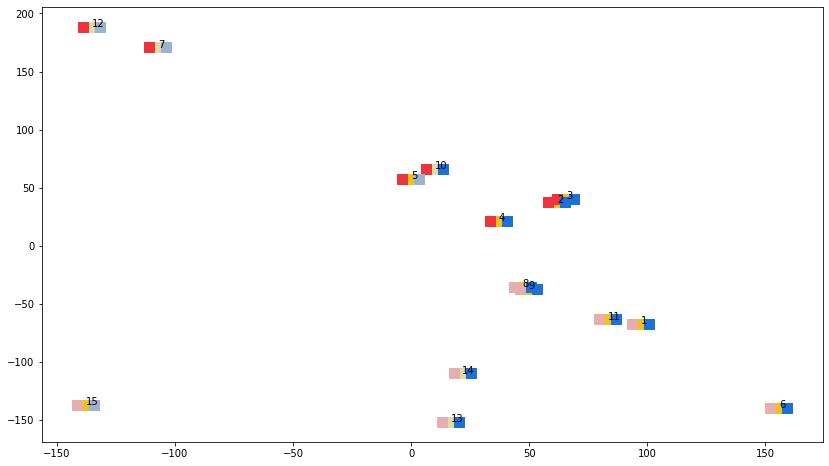

tensor([[ 1.1565e-04,  1.6736e-04],
        [ 1.4863e-05, -2.4645e-05],
        [-9.0175e-06,  1.4667e-05],
        [ 1.3071e-04, -2.2848e-04],
        [ 1.9017e-04,  2.8684e-07],
        [-7.4642e-05, -8.3107e-05],
        [ 1.0670e-04,  6.6998e-05],
        [ 8.1955e-05,  1.0858e-04],
        [ 1.0699e-04,  1.4420e-04],
        [-2.5098e-04,  3.7274e-05],
        [ 3.3678e-05,  4.4075e-05],
        [-3.2770e-05, -2.3470e-05],
        [-8.0736e-05, -8.8417e-06],
        [ 4.8648e-05,  9.5775e-06],
        [ 1.1427e-05, -1.1464e-05]], dtype=torch.float64)


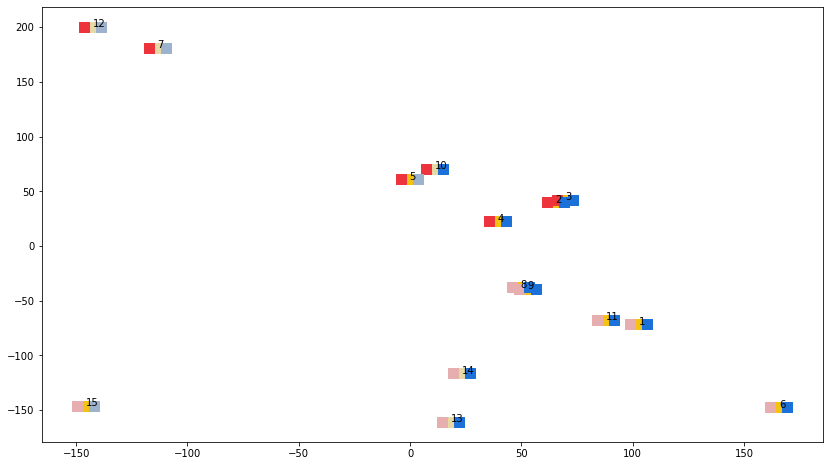

tensor([[ 1.0447e-04,  1.4952e-04],
        [ 6.6266e-07, -1.0897e-06],
        [ 7.2549e-07, -1.1931e-06],
        [ 1.2531e-04, -2.1999e-04],
        [ 1.5644e-04,  1.0621e-06],
        [-6.3172e-05, -7.0941e-05],
        [ 9.5994e-05,  6.0297e-05],
        [ 6.8332e-05,  8.9654e-05],
        [ 8.6806e-05,  1.1543e-04],
        [-2.1836e-04,  3.4565e-05],
        [ 2.6444e-05,  3.4268e-05],
        [-2.8377e-05, -2.0185e-05],
        [-7.2868e-05, -8.2946e-06],
        [ 4.5540e-05,  9.0442e-06],
        [ 1.4946e-05, -1.4942e-05]], dtype=torch.float64)


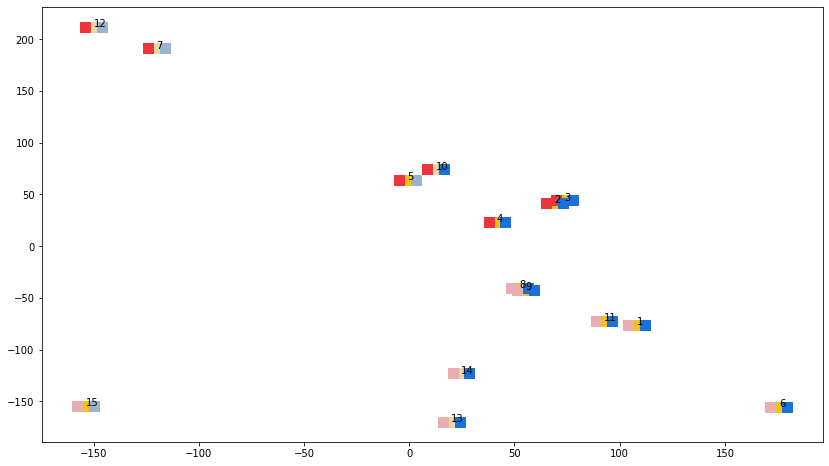

tensor([[ 9.4494e-05,  1.3383e-04],
        [-1.0387e-05,  1.6956e-05],
        [ 8.7422e-06, -1.4521e-05],
        [ 1.1570e-04, -2.0329e-04],
        [ 1.2686e-04,  1.5368e-06],
        [-5.3513e-05, -6.0568e-05],
        [ 8.6571e-05,  5.4410e-05],
        [ 5.5786e-05,  7.2493e-05],
        [ 6.8622e-05,  9.0073e-05],
        [-1.8913e-04,  3.1733e-05],
        [ 2.0456e-05,  2.6272e-05],
        [-2.4704e-05, -1.7464e-05],
        [-6.6407e-05, -7.8226e-06],
        [ 4.2123e-05,  8.4264e-06],
        [ 1.7857e-05, -1.7797e-05]], dtype=torch.float64)


In [6]:
losses = []
for i in range(1000):
    loss = WCSL(embeddings, labels)
    loss.backward()
    optimiser.step()
    losses.append(loss.detach())
    if not i % 50:
        plot_embeddings(embeddings, labels)
        print(embeddings.grad)
    optimiser.zero_grad()

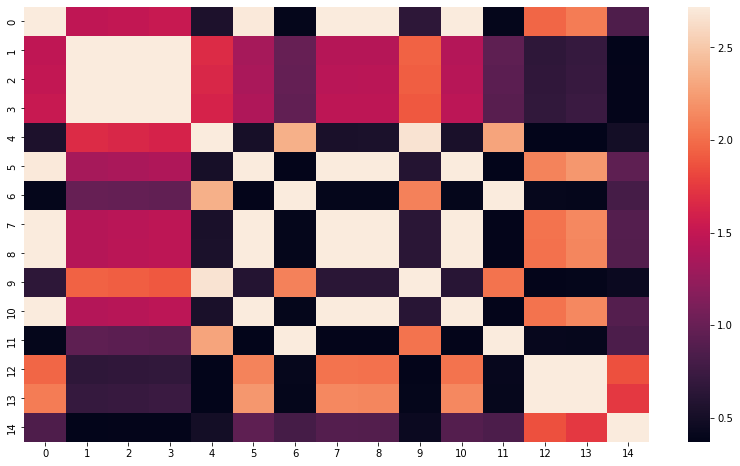

In [7]:
sns.heatmap(WCSL.exp_cosine_sim(embeddings, embeddings).detach().numpy())
plt.show()

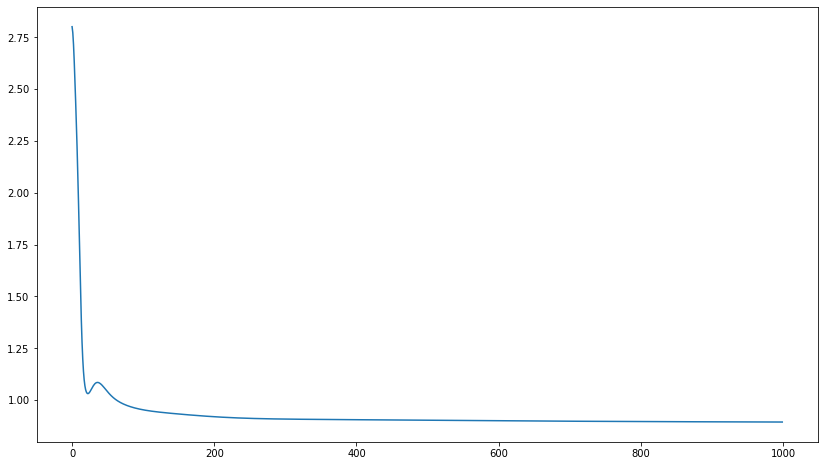

In [8]:
plt.plot(losses)
plt.show()